# Importing Libraries  and Data Preprocessing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [60]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Polycystic-ovary-syndrome-PCOS-Prediction-master\data\data without infertility _final.csv')

In [61]:
#DELETING UNNECESSARY COLS
del df["Unnamed: 42"]
del df['Sl. No']
del df['Patient File No.']

In [62]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')

In [63]:
# CHECKING FOR MISSING VALUES
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

     Marraige Status (Yrs)  AMH(ng/mL)  Fast food (Y/N)
156                    5.0        5.27              NaN
305                    9.0         NaN              0.0
458                    NaN        6.60              0.0


In [64]:
# REPLACING MISSING VALUES BY MEDIAN
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [65]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

# Data Visualisation

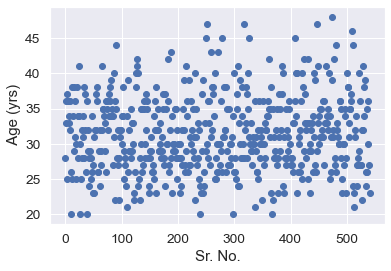

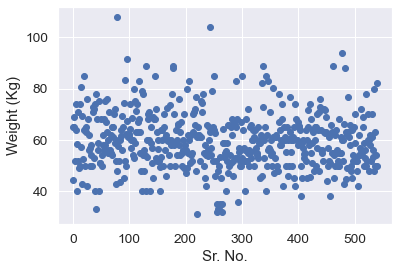

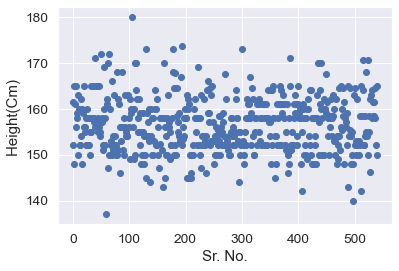

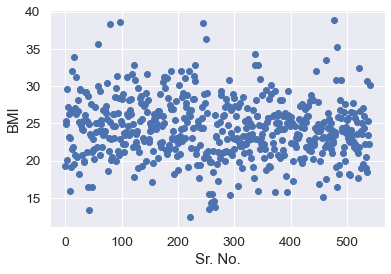

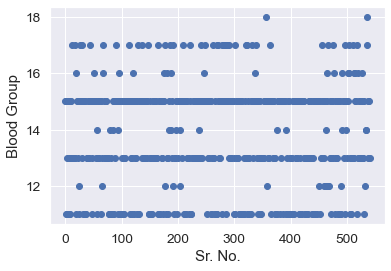

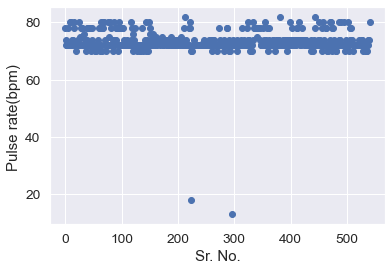

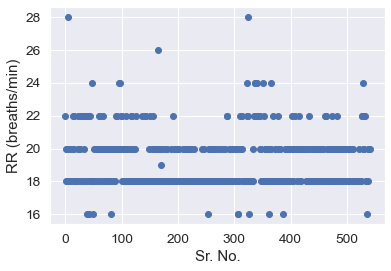

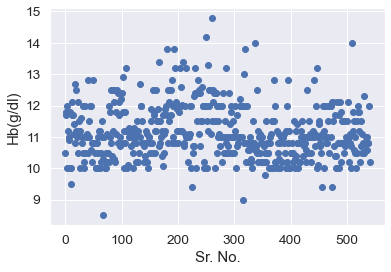

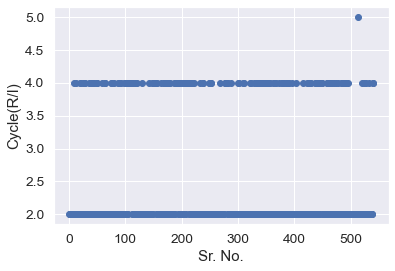

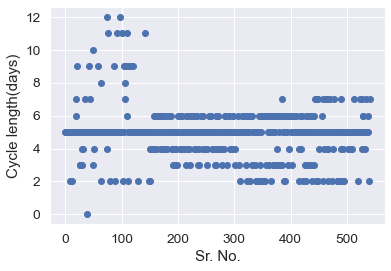

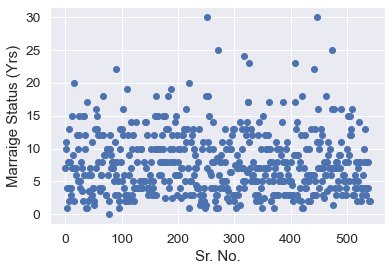

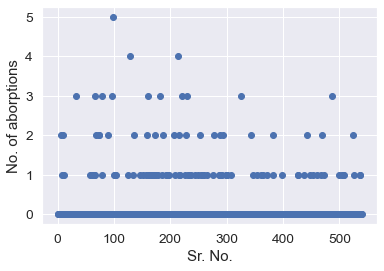

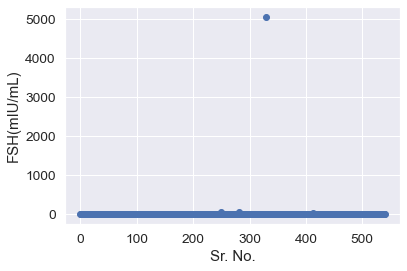

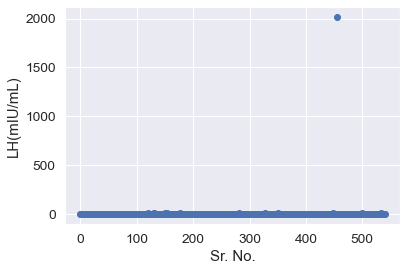

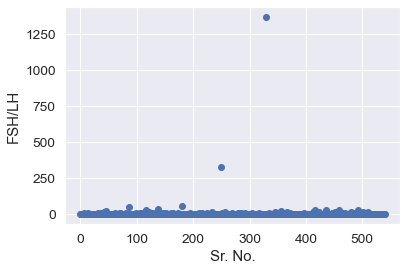

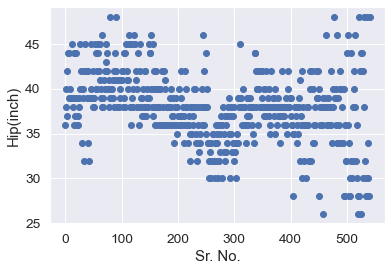

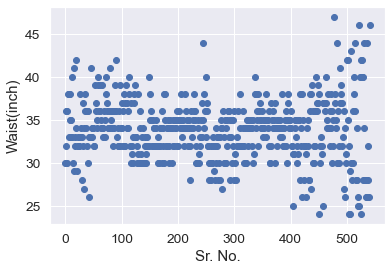

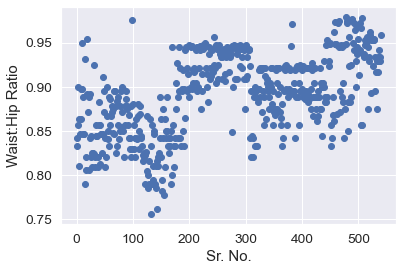

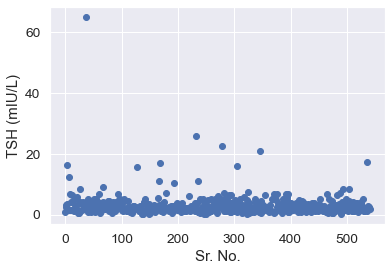

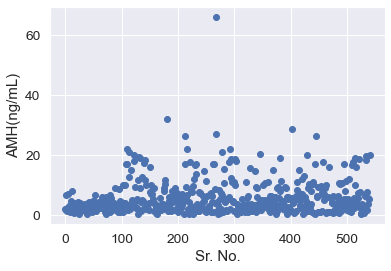

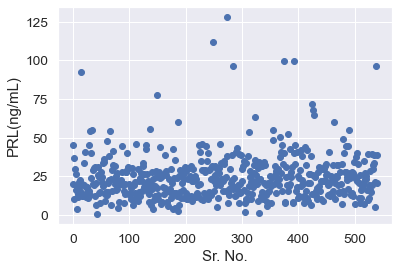

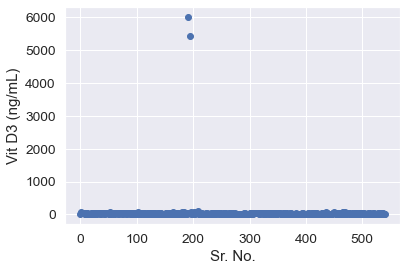

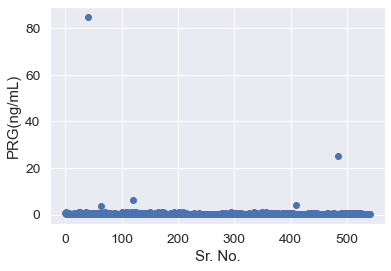

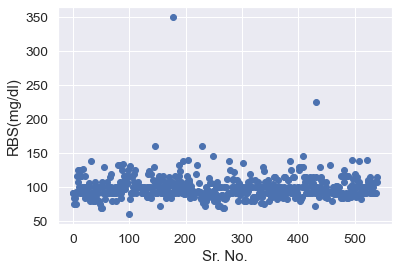

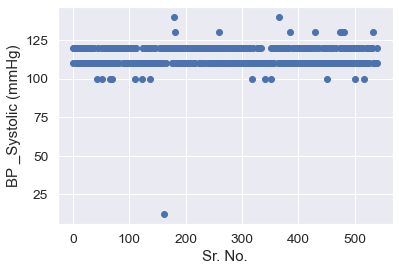

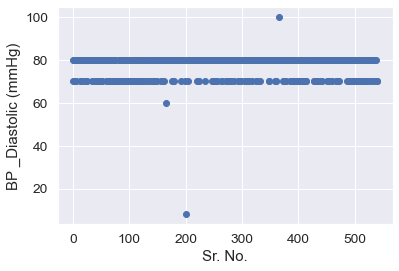

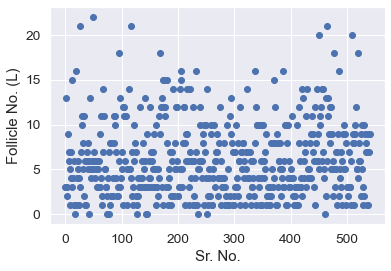

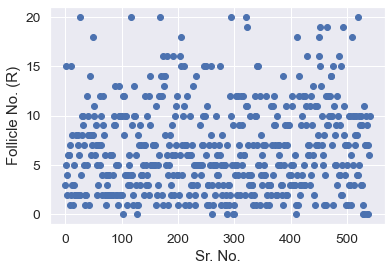

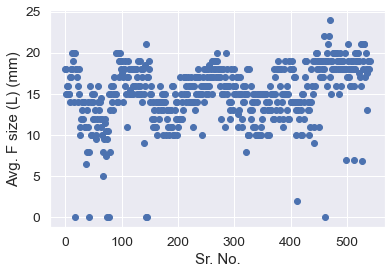

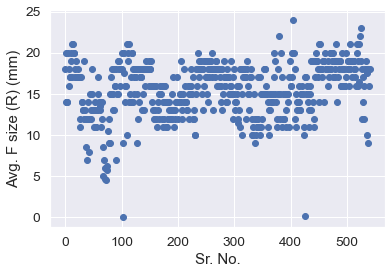

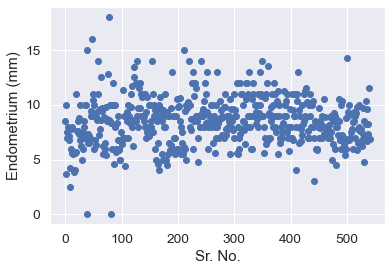

In [67]:
#Plotting  histogram for outlier detection
#Excluding columns which has binary values
cols = list(df.columns)

for col in cols:    
    if(col.strip()[-5:]) != "(Y/N)":
        plt.scatter([var for var in range(len(df[col]))], df[col])
        plt.xlabel('Sr. No.')
        plt.ylabel(col)
        plt.show()

#Outliers in the following columns:
#  Pulse Rate(bpm) -
#  Cycle(R/I)
#  FSH(mIU/mL) -
#  LH(mIU/mL) -
#  FSH/LH - 
#  TSH(mIU/L)
#  Vit D3(ng/mL) - 
#  PRG(ng/mL)
#  RBS(mg/dl)
#  BP Systolic - 
#  BP Diastolic -

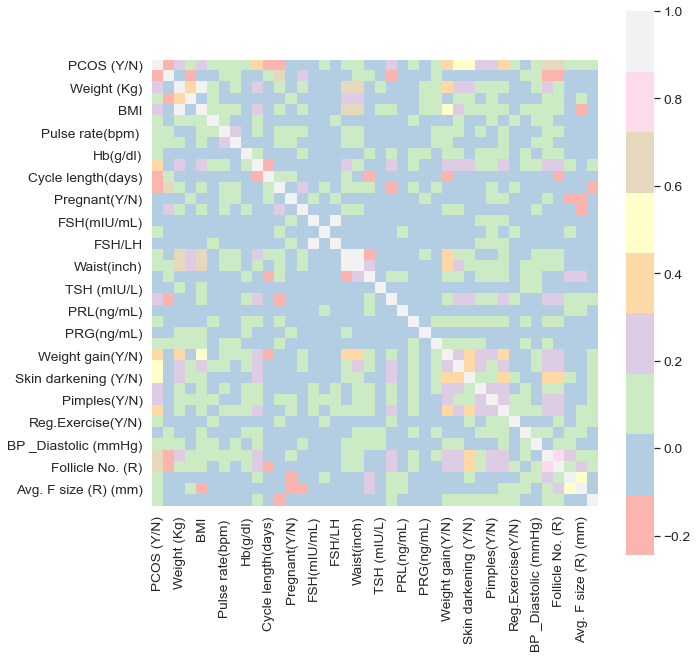

In [68]:
#Examaning a coRrelation matrix of all the features 

corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

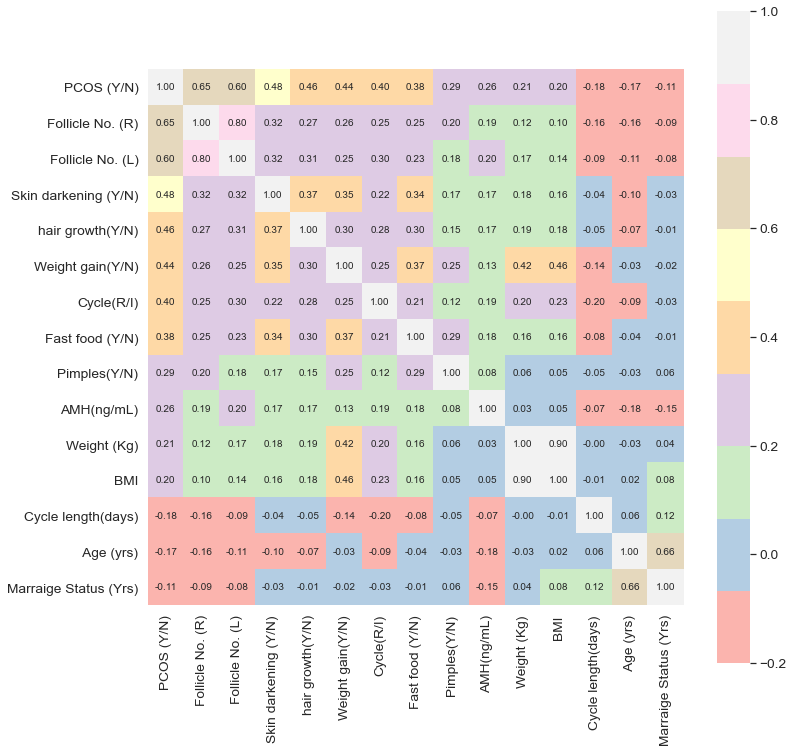

In [69]:
#Having a look at features bearing significant corelation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model Building

In [70]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

# Fitting Radom Forest Classifier

In [71]:
rfc = RandomForestClassifier(n_estimators=9)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [72]:
print("Random forest model accuracy(in %):", metrics.accuracy_score(y_test, rfc_predict)*100)

Random forest model accuracy(in %): 87.15083798882681


In [73]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=var)
    rfc = RandomForestClassifier(n_estimators=9)
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    score = metrics.accuracy_score(y_test, rfc_predict)*100
    if (score > max):
        max = score
    average_accuracy += score
print(average_accuracy/542)
print (max)

86.60042466346434
93.85474860335195


# Fitting Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred = lr.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 87.70949720670392


In [76]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [77]:
print(average_accuracy/541)
print (max)

86.15433864455424
92.73743016759776


<AxesSubplot:>

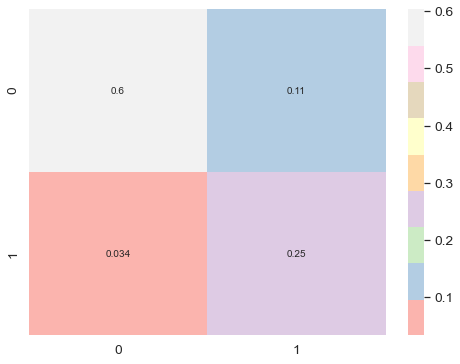

In [78]:
# cofusion matrix for RFC
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10}, cmap = 'Pastel1')

<AxesSubplot:>

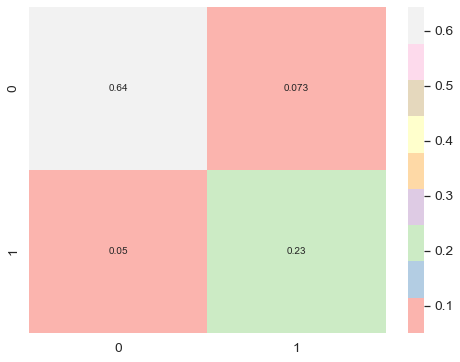

In [79]:
# cofusion matrix for Logistic Regression
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10}, cmap = 'Pastel1')